# Covid-19 Turkey 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import sklearn
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from datapackage import Package

package = Package('https://datahub.io/core/covid-19/datapackage.json')

In [3]:
countries_aggregated_csv = package.get_resource('countries-aggregated_csv').read(keyed=True)
package.get_resource('countries-aggregated_csv').headers

['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths']

In [4]:
# Creating a dataframe object from listoftuples
worldwide_aggregated_df = pd.DataFrame(countries_aggregated_csv)

worldwide_aggregated_df.head(3)

,Confirmed,Country,Date,Deaths,Recovered
0,0,Afghanistan,2020-01-22,0,0
1,0,Albania,2020-01-22,0,0
2,0,Algeria,2020-01-22,0,0


## Selecting Countries for comparison

In [5]:
#Select Turkey, USA, Italy, Spain, Germany after 100 cases

In [6]:
turkey_df = worldwide_aggregated_df[ worldwide_aggregated_df['Country'] == 'Turkey' ]
turkey_df.head(3)

### Confirmed Cases bigger than 0

turkey_df = turkey_df[turkey_df['Confirmed'] > 95]
turkey_df.head()

turkey_df_1 = turkey_df.loc[:,['Confirmed']]
turkey_df_1 = turkey_df_1.reset_index()
turkey_df_1.tail()

,index,Confirmed
20,14230,34109
21,14415,38226
22,14600,42282
23,14785,47029
24,14970,52167


In [7]:
italy_df = worldwide_aggregated_df[ worldwide_aggregated_df['Country'] == 'Italy' ]
italy_df.head(3)

### Confirmed Cases bigger than 0

italy_df = italy_df[italy_df['Confirmed'] > 95]
italy_df.head()

italy_df_1  = italy_df.loc[:,['Confirmed']]
italy_df_1 = italy_df_1.reset_index()
italy_df_1.tail()

,index,Confirmed
44,14144,135586
45,14329,139422
46,14514,143626
47,14699,147577
48,14884,152271


In [8]:
US_df = worldwide_aggregated_df[ worldwide_aggregated_df['Country'] == 'US' ]
US_df.head(3)

### Confirmed Cases bigger than 0

US_df = US_df[US_df['Confirmed'] > 95]
US_df.head()

US_df_1 = US_df.loc[:,['Confirmed']]
US_df_1 = US_df_1.reset_index()
US_df_1.head()

,index,Confirmed
0,7571,98
1,7756,118
2,7941,149
3,8126,217
4,8311,262


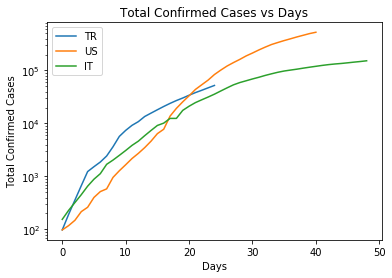

In [9]:
%matplotlib inline
plt.plot(turkey_df_1.Confirmed,label='TR')
plt.plot(US_df_1.Confirmed,label='US')
plt.plot(italy_df_1.Confirmed,label='IT')
#plt.plot(np.linspace(0,100), exponential_model(np.linspace(0,100),*popt_exp), color='r',label='pre_exp')
#plt.plot(np.linspace(0,100), logistic_model(np.linspace(0,100),*popt_log), color='b',label='pre_log')

plt.title("Total Confirmed Cases vs Days")
plt.xlabel('Days')
plt.ylabel('Total Confirmed Cases')
plt.yscale('log')
#plt.ylim(0, c_log*1.1)
plt.legend()
plt.show()